In [2]:
# Always reload modules before executing code.
%load_ext autoreload
%autoreload 2

In [3]:
#py3.7.4

import itertools
import json
import math
import os
import time

import cv2
from matplotlib import pyplot as plt
import numpy as np

from platform import python_version

print(python_version())

from vp import draw_tools
from vp import scoring
from vp import vp_finder


import helpers
import toulouse
import york_urban


3.7.4


In [4]:
# Load York Urban dataset.
YORK_URBAN_DATASET_FOLDER = '../YorkUrbanDB'
york_urban_dataset_path = os.path.abspath(os.path.join(os.getcwd(), YORK_URBAN_DATASET_FOLDER))
print('Loading dataset at %s.' % york_urban_dataset_path)
york_urban_dataset = york_urban.load_dataset(york_urban_dataset_path)#.with_mask(set(range(5)))
print('\nLoaded %s images from dataset.' % len(york_urban_dataset.image_paths))
print(york_urban_dataset.image_paths)

Loading dataset at /Users/harrybeggs/Documents/Projects/Local-Projects/Python/vp-toolbox-master/YorkUrbanDB_2.
.Find all intersections[[244.625, 214.525, 248.425, 279.425], [280.425, 221.625, 284.625, 282.125], [269.425, 218.725, 273.625, 281.575], [302.475, 224.475, 305.6, 283.35], [310.475, 226.675, 313.725, 284.575], [233.425, 212.625, 237.375, 278.925], [161.52499999999998, 200.625, 163.59999999999997, 272.5], [149.375, 271.725, 147.425, 197.075], [113.425, 268.325, 112.475, 191.575], [96.62499999999999, 187.525, 97.475, 267.225], [56.425, 181.275, 56.57499999999999, 214.375], [427.6, 312.74999999999994, 412.625, 160.125], [325.34999999999997, 129.3, 328.525, 171.225], [597.425, 254.575, 604.625, 303.275], [594.375, 277.475, 592.525, 263.425], [583.425, 279.475, 581.725, 265.575], [350.475, 162.925, 353.525, 196.37499999999994], [370.55, 169.75, 373.525, 201.225], [389.375, 176.375, 392.425, 206.375], [406.4, 180.79999999999998, 409.575, 210.375], [51.57499999999999, 270.425, 51.57

In [6]:
# Run vanishing point detection and calculate error.
main_results_yud = helpers.batch_detect_vps_and_score(
    york_urban_dataset,
    vp_finder.find_vanishing_points_in_image)

 488.126977 445.578392]
 [329.410341 438.60341  376.868034 440.777086]
 [476.848205 442.475893 423.093614 440.078854]
 [475.603302 448.819127 414.335022 446.903942]
 [474.404632 436.103424 429.3271   434.372248]
 [265.641904 430.251866 331.869238 433.252182]
 [269.332202 425.249804 319.395838 427.699054]
 [375.664434 444.326593 321.812252 442.691065]
 [376.928602 438.23264  331.851889 436.117527]
 [319.385172 430.384743 269.368982 428.267137]
 [319.432681 435.611038 258.139196 432.813919]
 [323.132726 425.41327  276.898678 423.726128]] number of data points 15
Intersections length 105
Lines length 15
Fit data : [[327.567848  57.560184 426.031496 137.625092]]
Choose best VP by max error lines : [[327.567848  57.560184 426.031496 137.625092]]
Find all intersections[[327.567848  57.560184 426.031496 137.625092]] number of data points 1
Intersections length 0
Lines length 1
Fit data : [[483.489306 125.216584 540.794938 185.525779]]
Choose best VP by max error lines : [[483.489306 125.21658

Left side is ground truth, right side is detection results.
ground truth index 0 
  [(-10.392493328419341, -3798.68014751131), (824.7693346853049, 317.7434106963539)]
vp result index 0 
  dict_keys([(951.5030646902864, 7470.388111580149), (206.14977661213064, 459.3975564764214), (57.940079083386415, 1139.5140830602738), (-2034.7708261634818, 917.9571490480085), (849.6987241576239, 320.14381634246035), (417.6410595140978, 438.4456975140057)])
/Users/harrybeggs/Documents/Projects/Local-Projects/Python/vp-toolbox-master/YorkUrbanDB_2/P1020171/P1020171.jpg


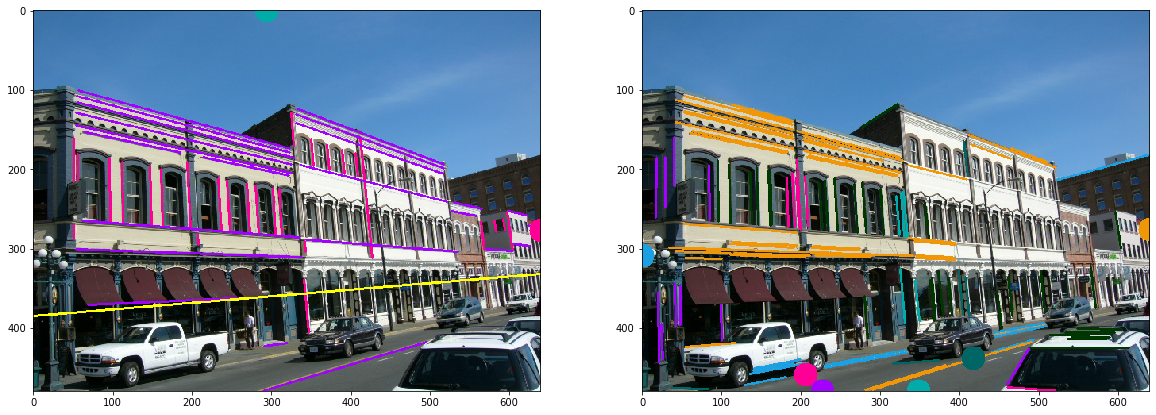

ground truth index 1 
  [(-287.76539436387986, 330.8191305756993), (411.99940880477806, -3374.3536874082056), (754.2335883704133, 410.5802905336208)]
vp result index 1 
  dict_keys([(887.8058502902466, 455.5072264348168), (-137.55709282860408, 441.3083122752929), (387.3865175577444, 353.51621706357577), (345.1111206685861, 511.4192620270097), (336.00140685725563, -2377.3441847893705), (2177.1151427729146, -458.12723277712877)])
/Users/harrybeggs/Documents/Projects/Local-Projects/Python/vp-toolbox-master/YorkUrbanDB_2/P1020177/P1020177.jpg


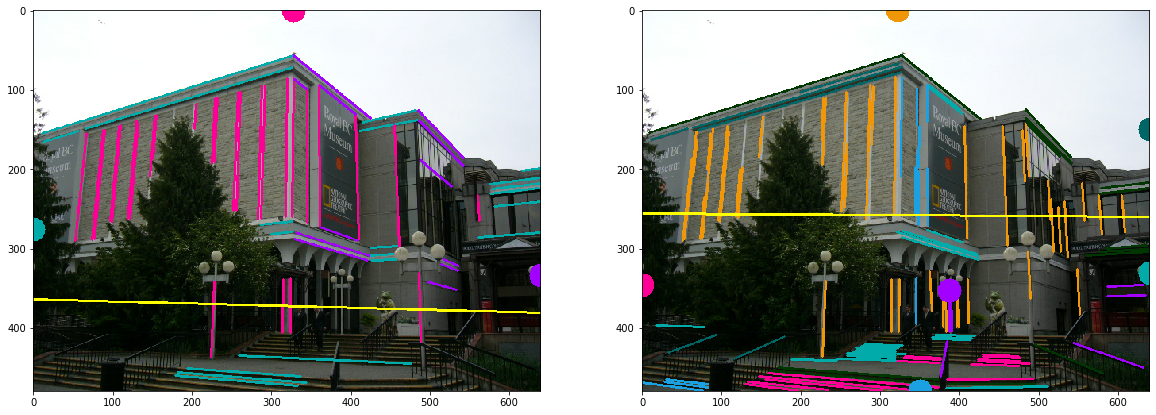

In [7]:
# Visualize a sample of results.
SAMPLE_INDICES = range(len(york_urban_dataset.image_paths))[:5]
helpers.visualize_vp_detection_results(york_urban_dataset, main_results_yud) #mask_indices=SAMPLE_INDICES

Horizon detection error is the pixel distance between the detected and actual horizon, divided by the image height.


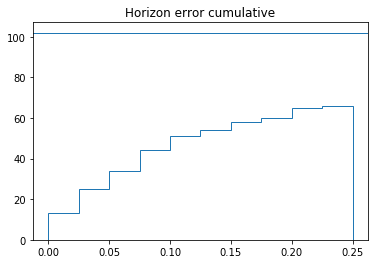

	Median: 0.12.
	64.71% of results were within a quarter-image distance of the actual horizon.

This shows the horizon error if we always guessed a flat, image-center horizon, i.e., no algorithm at all.


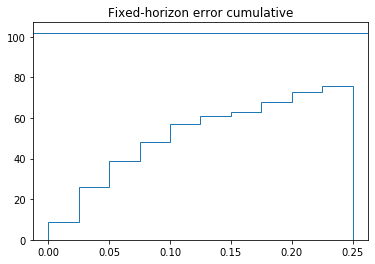

	Median: 0.11.
	74.51% of the images had a horizon closer to the center of the image than the edges.

VP direction error is the difference in angle from image center to the actual and detected VPs.


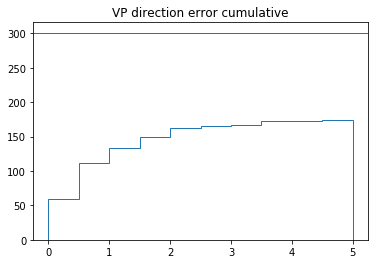

	Median: 2.00.
	57.81% of GT VPs were detected within 5 degrees, or 63.74% if we omit the 9.30% of GT VPs that were completely undetected.


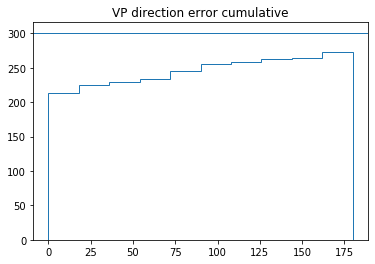

	Median: 2.00.


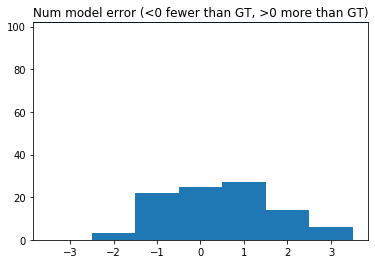

	Median: 1.00. Max: 4.00


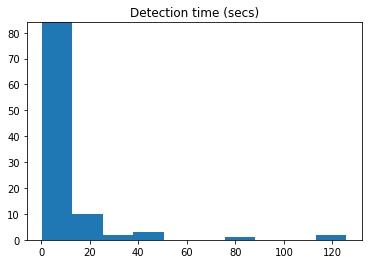

	Median: 3.79. Max: 125.75


In [7]:
helpers.show_results_summary(york_urban_dataset, main_results_yud)

## Other methods and examples

In [ ]:
# X-RANSAC: Run vanishing point detection and calculate error.
x_ransac_results = helpers.batch_detect_vps_and_score(
    york_urban_dataset,
    lambda img: vp_finder.find_vanishing_points_in_image(
        img,
        line_detection_options=vp_finder.LineDetectionOptions(),
        ransac_options=vp_finder.RansacOptions(
            min_inliers=1, inlier_threshold=4, desired_success_rate=0.95),
        x_ransac_options=vp_finder.XRansacOptions()))

In [ ]:
helpers.show_results_summary(york_urban_dataset, x_ransac_results)

In [ ]:
# Visualize a sample of results.
SAMPLE_INDICES = range(len(york_urban_dataset.image_paths))[:5]
helpers.visualize_vp_detection_results(
    york_urban_dataset, x_ransac_results, mask_indices=SAMPLE_INDICES)

In [ ]:
# Load Toulouse dataset.
# This higher res dataset tends to be slower and a bit more challenging.

TOULOUSE_DATASET_FOLDER = '../toulouse_dataset/tvpd_dataset'
toulouse_dataset_path = os.path.abspath(os.path.join(os.getcwd(), TOULOUSE_DATASET_FOLDER))
print('Loading dataset at %s.' % toulouse_dataset_path)
toulouse_dataset = toulouse.load_dataset(toulouse_dataset_path)
print('\nLoaded %s images from dataset.' % len(toulouse_dataset.image_paths))


In [ ]:
# Visualize LSD line detector results.
"""
from vp import line_detector
im = cv2.imread(york_urban_dataset.image_paths[2])
wim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
lines = line_detector.lsd_lines(wim, min_line_length=.055)
print(len(lines))
draw_tools.draw_lines(lines, im)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.imshow(im)
plt.show()
"""